Data (1) importing via panda. Sheet name "Data" contains the raw data with the other pages containing contextual information along with graphs etc.

In [ ]:
import pandas as pd
#IMPORT DATASET 1

#import first dataset
data = pd.read_excel("weekly_fuel_prices_251124.xlsx",sheet_name="Data")
data

,Weekly Prices time series (from 2003),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,ULSP = Ultra low sulphur unleaded petrol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ULSD = Ultra low sulphur diesel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Duty rates over time can be found in the duty ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Empty cells represent weeks where differences ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,An 'r' next to a value indicates it has been r...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1127,2024-11-25 00:00:00,135.36596,0.517528,-12.6265,52.95,20,141.40484,0.917461,-14.778436,52.95,20
1128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Function created to reuse cleaning steps

Table within the sheet does not start at the top, rather, table information is stored at the top of the spreadsheet with the table starting below. The column row can be observed either through the spread sheet or via trial and error using slicing. Using a row slice of i.e. 5:9 would show the column names are stored at row 6 with all below rows being the data. Knowing this row, the contents can be reassigned as the colmns of the pandas dataframe.

Some cells may be empty and will not be flagged at nan. These can be replaced with nan so all cells that may cause issues can be removed together.

Above the column row (row 6) will have NaN values due to the empty space above it that contains table information. This can be removed by identifying where, in the imported table, all of the columns have NaN values. These rows can be removed.

Using the function, we can create a new truncated and cleaner pandas dataframe.

In [ ]:
#CLEANING AND STRUCTURING

def clean(data,column_row):
    #Reassign true column names which are stored on row 6
    data.columns=pd.Index(data.iloc[column_row].values) 
    
    #turn any empty entries into None to be recognised and rmeoved
    data = data.replace(to_replace=" ", value = None) 
    
    #Remove any rows with no data due to excel format to dataframe conversion
    mask = data.iloc[:,1:].isna().all(axis=1) 
    
    #Omit row that contains column names
    mask[column_row] = True 
    data_trunc = data[~mask]
    return data_trunc
data_trunc = clean(data,6)

#view head to show top NaN values have been truncated
data_trunc.head() 

,Date,ULSP: Pump price (p/litre),ULSP: Diff on previous WEEK (p/litre),ULSP: Diff on previous YEAR (p/litre),Duty rate ULSP (p/litre),VAT (% rate) ULSP,ULSD: Pump price (p/litre),ULSD: Diff on previous WEEK (p/litre),ULSD: Diff on previous YEAR (p/litre),Duty rate ULSD (p/litre),VAT (% rate) ULSD
7,2003-06-09 00:00:00,74.590284,NaN,NaN,45.82,17.5,76.773394,NaN,NaN,45.82,17.5
8,2003-06-16 00:00:00,74.469143,-0.121141,NaN,45.82,17.5,76.689054,-0.08434,NaN,45.82,17.5
9,2003-06-23 00:00:00,74.423566,0,NaN,45.82,17.5,76.620546,-0.068508,NaN,45.82,17.5
10,2003-06-30 00:00:00,74.352421,-0.071145,NaN,45.82,17.5,76.50526,-0.115286,NaN,45.82,17.5
11,2003-07-07 00:00:00,74.283737,-0.068684,NaN,45.82,17.5,76.457376,0,NaN,45.82,17.5


In [ ]:
#view head to show bottom NaN values have been truncated
data_trunc.tail()

,Date,ULSP: Pump price (p/litre),ULSP: Diff on previous WEEK (p/litre),ULSP: Diff on previous YEAR (p/litre),Duty rate ULSP (p/litre),VAT (% rate) ULSP,ULSD: Pump price (p/litre),ULSD: Diff on previous WEEK (p/litre),ULSD: Diff on previous YEAR (p/litre),Duty rate ULSD (p/litre),VAT (% rate) ULSD
1123,2024-10-28 00:00:00,134.413331,0.425065,-19.560125,52.95,20,139.709745,0.448778,-22.04653,52.95,20
1124,2024-11-04 00:00:00,134.410302,0,-18.794464,52.95,20,139.843958,0.134213,-21.015989,52.95,20
1125,2024-11-11 00:00:00,134.59466,0.184358,-17.795949,52.95,20,140.134223,0.290265,-20.252406,52.95,20
1126,2024-11-18 00:00:00,134.848432,0.253772,-15.651865,52.95,20,140.487379,0.353156,-17.953746,52.95,20
1127,2024-11-25 00:00:00,135.36596,0.517528,-12.6265,52.95,20,141.40484,0.917461,-14.778436,52.95,20


We expect there to be NaN values in the "Diff on previous YEAR/WEEK" columns as prior yearly or weekly information is required for this. And so, early information will not have data stored here. "Diff on previous YEAR" will only have data when a year has elapsed in the dataset, and "Diff on previous WEEK" will only be removed after a week has elapsed in the dataset.

The dataset is expected to only have 1 year and 1 week of missing data, and so, we can use this rule to see if there is any other missing data aside from this. If there is, we will need to do further data cleaning to remediate this issue (data imputation via euclidean distancing). If not, we will only need to fill in the difference in yearly and weekly values.

Each row is a week. A year has 52 weeks and so we will expect 52 NaN values. With the same logic, we will expect 1 NaN value for the diff in week column. If these are true, there are no other NaN values in the dataset.

In [ ]:
#SANITY CHECK

#This checks if the number of NaN values equal the number of 
#weeks in a year. They should because all values we expected to be lost are in that first year where no previous year exists
print("Number of none values are only for the first year? :",data_trunc["ULSP: Diff on previous  YEAR (p/litre)"].isnull().sum() == 52 and
    data_trunc["ULSD: Diff on previous  YEAR (p/litre)"].isnull().sum() ==52) 

#Same for week column however only 1 should be missing (the 
#first row which has no prior week)
print("Number of none values are only for the first week? :",data_trunc["ULSP:  Diff on previous WEEK (p/litre)"].isnull().sum() == 1 and
    data_trunc["ULSD: Diff on previous WEEK (p/litre)"].isnull().sum() == 1)  

Number of none values are only for the first year? : True
Number of none values are only for the first week? : True


Knowing all nan values are due to weekly and yearly difference calculations unable to be calculated, these can be replaced all in one go as all have the same remediation. These values are 0, as we consider them to be the first date within the dataset and so will have 0 difference. 

The data within the spreadsheet file uses true division operations, leading to large numbers of decimal places. This is uneeded and so can be rounded off. The "Date" column is not a float datatype, but the rest of the columns are. Convert to this to then round as only this datatype can be rounded. 

In [ ]:
#DATA CLEANING

#We set 2003-06-09 00:00:00 as the start date to which this analysis occurs
data_trunc[["ULSP: Diff on previous  YEAR (p/litre)","ULSD: Diff on previous  YEAR (p/litre)","ULSP:  Diff on previous WEEK (p/litre)"
      ,"ULSD: Diff on previous WEEK (p/litre)"]] = data[["ULSP: Diff on previous  YEAR (p/litre)","ULSD: Diff on previous  YEAR (p/litre)","ULSP:  Diff on previous WEEK (p/litre)"
      ,"ULSD: Diff on previous WEEK (p/litre)"]].fillna(0)


#precision rounds to specific number of decimal places. Used for all rounding operations going forward
precision = 2 
data_trunc.iloc[:,1:] = data_trunc.iloc[:,1:].astype(float).round(precision)
data_trunc

,Date,ULSP: Pump price (p/litre),ULSP: Diff on previous WEEK (p/litre),ULSP: Diff on previous YEAR (p/litre),Duty rate ULSP (p/litre),VAT (% rate) ULSP,ULSD: Pump price (p/litre),ULSD: Diff on previous WEEK (p/litre),ULSD: Diff on previous YEAR (p/litre),Duty rate ULSD (p/litre),VAT (% rate) ULSD
7,2003-06-09 00:00:00,74.59,0.0,0.0,45.82,17.5,76.77,0.0,0.0,45.82,17.5
8,2003-06-16 00:00:00,74.47,-0.12,0.0,45.82,17.5,76.69,-0.08,0.0,45.82,17.5
9,2003-06-23 00:00:00,74.42,0.0,0.0,45.82,17.5,76.62,-0.07,0.0,45.82,17.5
10,2003-06-30 00:00:00,74.35,-0.07,0.0,45.82,17.5,76.51,-0.12,0.0,45.82,17.5
11,2003-07-07 00:00:00,74.28,-0.07,0.0,45.82,17.5,76.46,0.0,0.0,45.82,17.5
...,...,...,...,...,...,...,...,...,...,...,...
1123,2024-10-28 00:00:00,134.41,0.43,-19.56,52.95,20.0,139.71,0.45,-22.05,52.95,20.0
1124,2024-11-04 00:00:00,134.41,0.0,-18.79,52.95,20.0,139.84,0.13,-21.02,52.95,20.0
1125,2024-11-11 00:00:00,134.59,0.18,-17.8,52.95,20.0,140.13,0.29,-20.25,52.95,20.0
1126,2024-11-18 00:00:00,134.85,0.25,-15.65,52.95,20.0,140.49,0.35,-17.95,52.95,20.0


Numpy is used to handle statistical outlier analysis due to its ease of use for mathematical operations. All float values are used, so this is all columns excluding the Date column in the first column.

Outliers are identified using 3 sigma. If there are outliers, they can be investigated. If they can be deduced as genuine errors (i.e. obvious typo) they can be dropped. Numpy array is then converted back to a pandas dataframe reinstating the columns and Date column. However, there are no outliers identified so there is no need to do this

In [ ]:
#OUTLIER TESTING

import numpy as np

data_n = data_trunc.to_numpy()[:,[1,6]] #convert to numpy for outlier analysis. Only need fuel prices as everything else derives from them

def outlier_check(data_n,sigma=3):
    #Using 3 sigma.
    #mask used to determine if data points are above and below 3 sigma of the mean
    upper = data_n.mean(axis=0) + sigma * data_n.mean(axis=0)
    lower = data_n.mean(axis=0) - sigma * data_n.mean(axis=0)
    mask = (lower < data_n)|(data_n < upper)
    print("Number of outliers: ",sum(~mask))

outlier_check(data_n)


Number of outliers:  [0 0]


Columns can be renamed to simplify data

ULS stands for "ultra low sulfur". Ultra low fuel was mandatory in 2005 by the EU. Fuel prices between 2003-2005 will not include
all fuel sales, just ULS fuel. This can be included in a table title, but we can change the name of ULSP and ULSD to
Petrol Price (p/litre) and Diesel (p/price) given the title specifies this is Ultra Low Sulfur. Set this as a level 0 column

This investigation does only cover ULS fuel as this is what we use today and so is relevant. The study involves only ULS fuel type, not all fuel type used.

Set pump price, diff on previous week and diff on previous year etc as level 1 column (characteristics associated with each fuel type)

Diff on previous week/year could be renamed i.e. ΔWeekly, Weekly Diff. We will use Weekly Difference and Yearly Difference 
for max clarity

Set date as the index for ease of use due to datetime operation ability in pandas.

In [ ]:
#DATA STRUCTURING

import copy

columns = pd.MultiIndex.from_product([["Petrol Price (p/litre)","Diesel Price (p/litre)"],
                                    ["Weekly Price", "Weekly Difference","Yearly Difference","Duty Rate","VAT (%)"]])

data_template = data_trunc.set_index("Date")

#Use deepcopy to make data_no_sales its own object (it contains nested structures). Use data for later.
data_no_sales = copy.deepcopy(data_template) 

#use new multi indexed format for more clarity
data_no_sales.columns = columns 
data_no_sales.name = "Ultra Low Sulfur Fuel Prices"
data_no_sales.head()

Petrol Price (p/litre)                                      \
                     Weekly Price Weekly Difference Yearly Difference   
Date                                                                    
2003-06-09                  74.59               0.0               0.0   
2003-06-16                  74.47             -0.12               0.0   
2003-06-23                  74.42               0.0               0.0   
2003-06-30                  74.35             -0.07               0.0   
2003-07-07                  74.28             -0.07               0.0   

                             Diesel Price (p/litre)                    \
           Duty Rate VAT (%)           Weekly Price Weekly Difference   
Date                                                                    
2003-06-09     45.82    17.5                  76.77               0.0   
2003-06-16     45.82    17.5                  76.69             -0.08   
2003-06-23     45.82    17.5                  76.62             -0.07   
2003-06-30     45.82    17.5                  76.51             -0.12   
2003-07-07     45.82    17.5                  76.46               0.0   

                                                
           Yearly Difference Duty Rate VAT (%)  
Date                                            
2003-06-09               0.0     45.82    17.5  
2003-06-16               0.0     45.82    17.5  
2003-06-23               0.0     45.82    17.5  
2003-06-30               0.0     45.82    17.5  
2003-07-07               0.0     45.82    17.5

Meaningful insights can also be extracted from fuel sales as well as fuel prices and so we can involve this dataset to listing
the road fuel sales from 2020 - 2024 (2). This region is predominantly ULS and so can assume all these sales are sold at the price
we have seen in the first dataset
This data is averaged out fuel sales across different regions. As the previous data is a national metric, the data to be extracted from
this new dataset will only be national i.e. total fuel sales per region

We can reuse the clean function previously made. From the spreadsheet, we can see the column containing the column information is 6 aswell.

‌

In [ ]:
#IMPORTING AND DATA CLEANING DATASET 2


data1 = pd.read_excel(r"average road fuel sales\20241010_Average_road_fuel_sales_deliveries_and_stock_levels.xlsx",sheet_name="Main table - sales")

data1_trunc = clean(data1,6) #use same function defined before that we used for the first dataset
data1_trunc.head()

,Date,Weekday,Fuel Type,North East,North West,Yorkshire and The Humber,East \nMidlands,West \nMidlands,East,London,South East,South West,Northern Ireland,Wales,Scotland,England\n [note 3],United Kingdom,NaN
7,2020-01-27 00:00:00,Monday,Diesel,10635,10814,12732,12937,12557,12262,8302,11124,11156,6333,11216,10997,11482,11276,NaN
8,2020-01-28 00:00:00,Tuesday,Diesel,10459,10829,12710,13273,13083,13007,8438,11602,11512,6220,11324,11007,11805,11547,NaN
9,2020-01-29 00:00:00,Wednesday,Diesel,10474,10760,12855,13281,12781,12757,8466,11514,11411,6713,11172,10961,11710,11475,NaN
10,2020-01-30 00:00:00,Thursday,Diesel,10537,10780,12644,12984,12644,12595,8220,11352,11319,6714,11159,11592,11571,11404,NaN
11,2020-01-31 00:00:00,Friday,Diesel,11564,11052,13050,13600,12890,13156,8631,11933,12082,7071,11916,11911,12059,11886,NaN


In [ ]:
data1_trunc.tail() #both top and bottom of the dataset do not have NaN values

,Date,Weekday,Fuel Type,North East,North West,Yorkshire and The Humber,East \nMidlands,West \nMidlands,East,London,South East,South West,Northern Ireland,Wales,Scotland,England\n [note 3],United Kingdom,NaN
5126,2024-09-25 00:00:00,Wednesday,Total,15298,15452,15973,18113,17952,18823,13465,17706,17316,7846,15757,15897,16918,16504,NaN
5127,2024-09-26 00:00:00,Thursday,Total,15014,15723,16286,18282,18052,18705,13791,17544,17106,8406,14591,16403,16970,16538,NaN
5128,2024-09-27 00:00:00,Friday,Total,18259,17536,18608,20435,20528,21229,16024,19798,18919,9052,16834,18155,19223,18704,NaN
5129,2024-09-28 00:00:00,Saturday,Total,13803,13274,13970,15498,15498,17396,14855,16506,14943,7164,12920,13482,15237,14730,NaN
5130,2024-09-29 00:00:00,Sunday,Total,12200,11624,11913,12999,13109,14442,12382,13831,12056,5566,10663,12166,12832,12444,NaN


The dataset splits the fuel sales per UK region however the fuel prices in our initial dataset are for the entire of the uk, so only the data for the entire of the uk will be used. 

The table has a Date column which can be used to join on. 

The table distinguishes fuel types. Splitting by fuel types into different rows allows greater control over the data and formatting with less required rows.


In [ ]:
from IPython.display import display
#DATA STRUCTURING

#Only interested in the sales for the United Kingdom as a whole as that is what the first dataset is covering.

data1_reformat = pd.DataFrame()
data1_structured = data1_trunc[["Date","Fuel Type","United Kingdom"]] #United Kingdom is the sum of fuel for all regions
data1_structured = data1_structured.set_index("Date")

#Must seperate fuel types into their own individual column. 
data1_reformat["Petrol Sales (litres)"]=data1_structured[data1_structured["Fuel Type"] == "Petrol"]["United Kingdom"] 
data1_reformat["Diesel Sales (litres)"]=data1_structured[data1_structured["Fuel Type"] == "Diesel"]["United Kingdom"]
data1_reformat["Total Sales (litres)"]=data1_structured[data1_structured["Fuel Type"] == "Total"]["United Kingdom"]

display(data1_reformat.head())



,Petrol Sales (litres),Diesel Sales (litres),Total Sales (litres)
Date,,,
2020-01-27,7089,11276,18366
2020-01-28,7193,11547,18740
2020-01-29,7153,11475,18628
2020-01-30,7226,11404,18630
2020-01-31,8213,11886,20099


The standard deviation of the data is relatively large. The spread may have meaning however not all the meaning will be able to be digested visually and may cause issues within the visualization step. Can reduce the spread using smoothing techniques such as rolling average.

Rolling average window size will cause the first x number of rows and set them to null as they are unable to be smoothed. Can replace these with the unsmoothed values as this will not cause visual issues overall as it will only be a small number of data samples compared to the total number.

In [ ]:
import warnings
warnings.simplefilter(action="ignore") #Prevent future warnings from Pandas reccomendations

#DATA CLEANING

#Spread of the data before smoothing
display(pd.DataFrame(data1_reformat.sort_values(["Petrol Sales (litres)","Diesel Sales (litres)","Total Sales (litres)"],ascending=False).std(),columns=["Standard Deviation"]))

#Random data. High variation. Very volatile therefore requires smoothing.
window = 10
for i in data1_reformat.columns:
    
    #reassign NaN values with the previous, untouched values
    temp = data1_reformat[i].iloc[:window+1].copy()
    data1_reformat[i] = data1_reformat[i].rolling(window=window).mean()
    data1_reformat[i].iloc[:window+1] = temp
    
#Spread of the data after smoothing
display(pd.DataFrame(data1_reformat.sort_values(["Petrol Sales (litres)","Diesel Sales (litres)","Total Sales (litres)"],ascending=False).std(),columns=["Standard Deviation"]))

data1_reformat.head(window)

,Standard Deviation
Petrol Sales (litres),1196.425912
Diesel Sales (litres),2054.077008
Total Sales (litres),2917.665299


,Standard Deviation
Petrol Sales (litres),1036.078422
Diesel Sales (litres),1177.230256
Total Sales (litres),2080.785841


,Petrol Sales (litres),Diesel Sales (litres),Total Sales (litres)
Date,,,
2020-01-27,7089,11276,18366
2020-01-28,7193,11547,18740
2020-01-29,7153,11475,18628
2020-01-30,7226,11404,18630
2020-01-31,8213,11886,20099
2020-02-01,7782,8661,16443
2020-02-02,6680,7314,13995
2020-02-03,7119,11378,18497
2020-02-04,7007,11445,18453


Insights can be made with this second dataset alone

In [152]:
#2ND DATASET INSIGHTS

#Dates with the highest fuel sales
display(data1_reformat.sort_values(["Total Sales (litres)"],ascending=False)[:10])

#Dates with the lowest fuel sales
display(data1_reformat.sort_values(["Total Sales (litres)"],ascending=False)[-10:])

,Petrol Sales (litres),Diesel Sales (litres),Total Sales (litres)
Date,,,
2021-10-01,8917.0,12250.5,21167.5
2021-09-30,8809.6,12220.5,21030.1
2021-10-02,8939.4,12005.5,20944.9
2021-09-29,8738.1,12157.0,20895.1
2021-09-28,8613.5,11668.5,20282.0
2021-10-03,8763.6,11492.1,20255.8
2020-01-31,8213,11886,20099
2021-09-27,8531.3,11208.4,19739.7
2021-09-25,8337.2,11243.6,19580.8


,Petrol Sales (litres),Diesel Sales (litres),Total Sales (litres)
Date,,,
2020-04-21,2082.6,3856.5,5938.9
2020-04-17,2089.7,3821.2,5910.7
2020-04-16,2051.4,3788.0,5839.1
2020-04-15,2037.1,3760.4,5797.3
2020-04-18,2082.2,3652.8,5734.7
2020-04-20,2034.4,3584.4,5618.6
2020-04-12,2052.4,3509.4,5561.6
2020-04-14,1967.8,3479.3,5446.9
2020-04-19,2006.1,3389.2,5395.1


Exact same analysis can be done to remove outliers using function previously made

In [ ]:
#OUTLIER TESTING

#Using 3 sigma
#convert into numpy for outlier testing
data_n = data1_reformat.to_numpy()
outlier_check(data_n)

Number of outliers:  [0 0 0]


Inner join on dates as the two datasets cover different periods. Save this as a different table with reduced dates but with sales figures

If you want common times between the two tables, this is saved in a commented out variable

In [ ]:
#DATA STRUCTURING

#store the times at which both datasets are valid. Uncomment if this is needed
#commontimes = data.index.intersection(data1.index) 

#Inner join on dates between the two datasets to include sales along with fuel prices
data_with_sales = data_template.join(data1_reformat,how="inner")
data_with_sales.head()

,ULSP: Pump price (p/litre),ULSP: Diff on previous WEEK (p/litre),ULSP: Diff on previous YEAR (p/litre),Duty rate ULSP (p/litre),VAT (% rate) ULSP,ULSD: Pump price (p/litre),ULSD: Diff on previous WEEK (p/litre),ULSD: Diff on previous YEAR (p/litre),Duty rate ULSD (p/litre),VAT (% rate) ULSD,Petrol Sales (litres),Diesel Sales (litres),Total Sales (litres)
Date,,,,,,,,,,,,,
2020-01-27,127.33,0.16,8.05,57.95,20.0,132.88,0.14,3.78,57.95,20.0,7089,11276,18366
2020-02-03,125.85,-1.49,6.72,57.95,20.0,131.48,-1.41,2.34,57.95,20.0,7119,11378,18497
2020-02-10,124.73,-1.12,5.76,57.95,20.0,129.7,-1.77,0.53,57.95,20.0,7086.3,9960.7,17047.3
2020-02-17,123.8,-0.93,4.75,57.95,20.0,128.2,-1.5,-1.03,57.95,20.0,6882.7,9896.6,16779.4
2020-02-24,123.45,-0.35,4.22,57.95,20.0,127.67,-0.53,-1.99,57.95,20.0,6892.1,9813.5,16705.7


Reformat into Multi Indexed table for better structure and readability.
Assign dataframe name

In [ ]:
#DATA STRUCTURING

#Include multi indexing for better formatting of the new table
array = [["Petrol Price (p/litre)","Petrol Price (p/litre)","Petrol Price (p/litre)","Petrol Price (p/litre)","Petrol Price (p/litre)",
          "Diesel Price (p/litre)","Diesel Price (p/litre)","Diesel Price (p/litre)","Diesel Price (p/litre)","Diesel Price (p/litre)",
          "UK Sales (litres)","UK Sales (litres)","UK Sales (litres)"],
         ["Weekly Price","Weekly Difference","Yearly Difference","Duty Free", "VAT (%)",
          "Weekly Price","Weekly Difference","Yearly Difference","Duty Free", "VAT (%)",
          "Petrol","Diesel","Total"]]
columns = pd.MultiIndex.from_arrays(array)

#Assign these new columns
data_with_sales.columns = columns
data_with_sales.name = "Ultra Low Sulfur Fuel Prices"
data_with_sales.head()

Petrol Price (p/litre)                                      \
                     Weekly Price Weekly Difference Yearly Difference   
Date                                                                    
2020-01-27                 127.33              0.16              8.05   
2020-02-03                 125.85             -1.49              6.72   
2020-02-10                 124.73             -1.12              5.76   
2020-02-17                  123.8             -0.93              4.75   
2020-02-24                 123.45             -0.35              4.22   

                             Diesel Price (p/litre)                    \
           Duty Free VAT (%)           Weekly Price Weekly Difference   
Date                                                                    
2020-01-27     57.95    20.0                 132.88              0.14   
2020-02-03     57.95    20.0                 131.48             -1.41   
2020-02-10     57.95    20.0                  129.7             -1.77   
2020-02-17     57.95    20.0                  128.2              -1.5   
2020-02-24     57.95    20.0                 127.67             -0.53   

                                               UK Sales (litres)          \
           Yearly Difference Duty Free VAT (%)            Petrol  Diesel   
Date                                                                       
2020-01-27              3.78     57.95    20.0              7089   11276   
2020-02-03              2.34     57.95    20.0              7119   11378   
2020-02-10              0.53     57.95    20.0            7086.3  9960.7   
2020-02-17             -1.03     57.95    20.0            6882.7  9896.6   
2020-02-24             -1.99     57.95    20.0            6892.1  9813.5   

                     
              Total  
Date                 
2020-01-27    18366  
2020-02-03    18497  
2020-02-10  17047.3  
2020-02-17  16779.4  
2020-02-24  16705.7

Fuel price difference will variation over time between the types of fuel and their relative pricing. If one may be better than another in certain situations.

Fuel sales difference will show difference in demand relative to the price. Whereas sales in litres alone only shows demand.
Fuel sales can be split up further into their respective fuel types and a total between the two fuel types

In [156]:
from IPython.display import display

#FEATURE ENGINEERING

#Diesel and Petrol price may deviate from eachother. Higher difference implies Diesel is more expensive than petrol vice versa

data_no_sales["Fuel Price Difference (p/litre)"] = data_no_sales["Diesel Price (p/litre)","Weekly Price"]-data_no_sales["Petrol Price (p/litre)","Weekly Price"]

#Fuel sales difference
data_with_sales["UK Sales (litres)","Difference"] = data_with_sales["UK Sales (litres)","Diesel"]-data_with_sales["UK Sales (litres)","Petrol"]

#Total Sales in £
data_with_sales["UK Sales (£'000)","Petrol"] = (data_with_sales["Petrol Price (p/litre)","Weekly Price"]*data_with_sales["UK Sales (litres)","Petrol"]/100000).astype(float).round(precision)
data_with_sales["UK Sales (£'000)","Diesel"] = (data_with_sales["Diesel Price (p/litre)","Weekly Price"]*data_with_sales["UK Sales (litres)","Diesel"]/100000).astype(float).round(precision)
data_with_sales["UK Sales (£'000)","Total"] = data_with_sales["UK Sales (£'000)","Petrol"] + data_with_sales["UK Sales (£'000)","Diesel"]
data_with_sales["UK Sales (£'000)","Difference"] = data_with_sales["UK Sales (£'000)","Diesel"] - data_with_sales["UK Sales (£'000)","Petrol"]


display(data_no_sales.head(3),data_with_sales.head(3))

Petrol Price (p/litre)                                      \
                     Weekly Price Weekly Difference Yearly Difference   
Date                                                                    
2003-06-09                  74.59               0.0               0.0   
2003-06-16                  74.47             -0.12               0.0   
2003-06-23                  74.42               0.0               0.0   

                             Diesel Price (p/litre)                    \
           Duty Rate VAT (%)           Weekly Price Weekly Difference   
Date                                                                    
2003-06-09     45.82    17.5                  76.77               0.0   
2003-06-16     45.82    17.5                  76.69             -0.08   
2003-06-23     45.82    17.5                  76.62             -0.07   

                                               Fuel Price Difference (p/litre)  
           Yearly Difference Duty Rate VAT (%)                                  
Date                                                                            
2003-06-09               0.0     45.82    17.5                            2.18  
2003-06-16               0.0     45.82    17.5                            2.22  
2003-06-23               0.0     45.82    17.5                             2.2

Petrol Price (p/litre)                                      \
                     Weekly Price Weekly Difference Yearly Difference   
Date                                                                    
2020-01-27                 127.33              0.16              8.05   
2020-02-03                 125.85             -1.49              6.72   
2020-02-10                 124.73             -1.12              5.76   

                             Diesel Price (p/litre)                    \
           Duty Free VAT (%)           Weekly Price Weekly Difference   
Date                                                                    
2020-01-27     57.95    20.0                 132.88              0.14   
2020-02-03     57.95    20.0                 131.48             -1.41   
2020-02-10     57.95    20.0                  129.7             -1.77   

                                               UK Sales (litres)          \
           Yearly Difference Duty Free VAT (%)            Petrol  Diesel   
Date                                                                       
2020-01-27              3.78     57.95    20.0              7089   11276   
2020-02-03              2.34     57.95    20.0              7119   11378   
2020-02-10              0.53     57.95    20.0            7086.3  9960.7   

                               UK Sales (£'000)                           
              Total Difference           Petrol Diesel  Total Difference  
Date                                                                      
2020-01-27    18366       4187             9.03  14.98  24.01       5.95  
2020-02-03    18497       4259             8.96  14.96  23.92       6.00  
2020-02-10  17047.3     2874.4             8.84  12.92  21.76       4.08

2020-2022 have a rise in sales and fuel revenue however after, a large drop has happened in sales per litre. The litre sale drop is much larger than that of the revenue drop. Might show case the lower need for fuel going forward. Perhaps a transition to remote working, electric vehicles etc. 

Unimodal or normal distribution


,UK Sales (£'000)
,Total
Date,
2020-12-31,768.82
2021-12-31,1018.45
2022-12-31,1337.86
2023-12-31,1192.54
2024-12-31,850.09


,UK Sales (litres)
,Total
Date,
2020-12-31,654433.2
2021-12-31,758010.2
2022-12-31,776729.9
2023-12-31,777969.4
2024-12-31,575455.3


([<matplotlib.axis.XTick at 0x27db5702310>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

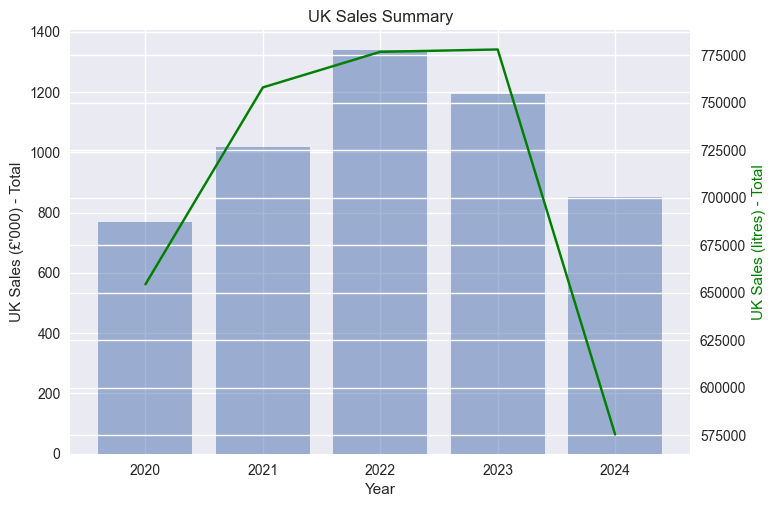

In [ ]:
from IPython.display import display
import matplotlib.pyplot as plt
#STATISTICAL SUMMARIES

#how much money has been spent per year on fuel
yearly_sales_sum = data_with_sales["UK Sales (£'000)","Total"].groupby(pd.Grouper(freq='YE')).sum()
yearly_sales_sum_L = data_with_sales["UK Sales (litres)","Total"].groupby(pd.Grouper(freq='YE')).sum()
display(pd.DataFrame(yearly_sales_sum))
display(pd.DataFrame(yearly_sales_sum_L))

fig = plt.figure()

#define primary and secondary axis
ax = plt.axes()
ax1 = ax.twinx()

#set title
ax.set_title("UK Sales Summary")

#set x amd y label (for both axis)
ax.set_xlabel("Year")
ax.set_ylabel("UK Sales (£'000) - Total")
ax1.set_ylabel("UK Sales (litres) - Total",color="green")

#Plot money spent on fuel per year in £ and litres
ax.bar(x=yearly_sales_sum.index.year,height=yearly_sales_sum,alpha=0.5)
ax1.plot(yearly_sales_sum.index.year,yearly_sales_sum_L,color="green")
plt.xticks(yearly_sales_sum.index.year)

Graph shows the fuel changes on a yearly basis are roughly the same for both fuel type. Seem to be fluctuation so in recent years as the extreme values are more past roughly 2015. Large values indicate large fuel changes within that year relative to the previous year.


,Petrol Price (p/litre),Diesel Price (p/litre)
,Yearly Difference,Yearly Difference
Date,,
2003-12-31,0.00,0.00
2004-12-31,3.69,3.73
2005-12-31,6.54,8.93
2006-12-31,4.60,4.36
2007-12-31,3.17,1.97
2008-12-31,12.38,20.37
2009-12-31,-7.41,-13.41
2010-12-31,17.31,15.09


Text(0.5, 1.0, 'Average Yearly Fuel Price Difference')

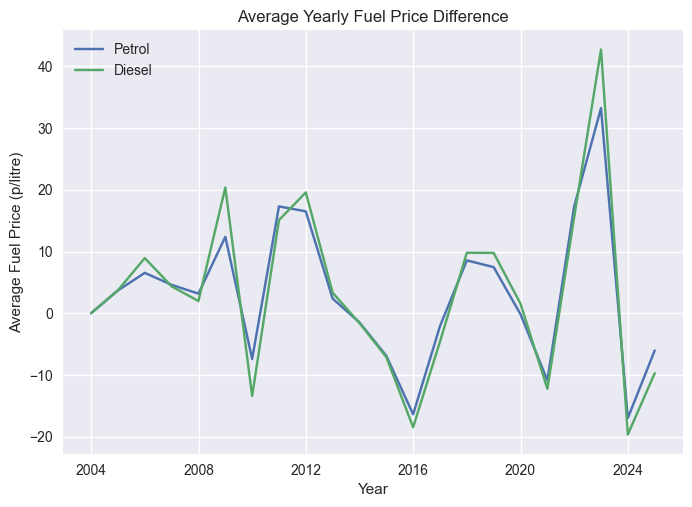

In [ ]:

#average yearly difference per year
display(data_no_sales[[
    ("Petrol Price (p/litre)", "Yearly Difference"),
    ("Diesel Price (p/litre)", "Yearly Difference")
]].groupby(pd.Grouper(freq='YE')).mean().astype(float).round(precision))

#Plot average yearly difference per year
plt.plot(data_no_sales["Petrol Price (p/litre)", "Yearly Difference"].groupby(pd.Grouper(freq='YE')).mean().astype(float).round(precision),label="Petrol")
plt.plot(data_no_sales["Diesel Price (p/litre)", "Yearly Difference"].groupby(pd.Grouper(freq='YE')).mean().astype(float).round(precision),label="Diesel")

#set x and y label
plt.xlabel("Year")
plt.ylabel("Average Fuel Price (p/litre)")
plt.legend()

#set title
plt.title("Average Yearly Fuel Price Difference")

The above statement is proved by looking at standard deviation across fuel prices averaged per year. Past 2015 the variation is much greater. However, the petrol price has not variated as much. Perhaps making its price more reliable? The petrol variation, although high, is more similar to previous years than the diesel price.

Bi modal distribution

Text(0.5, 1.0, 'Yearly Difference of Fuel Price - Standard Deviation')

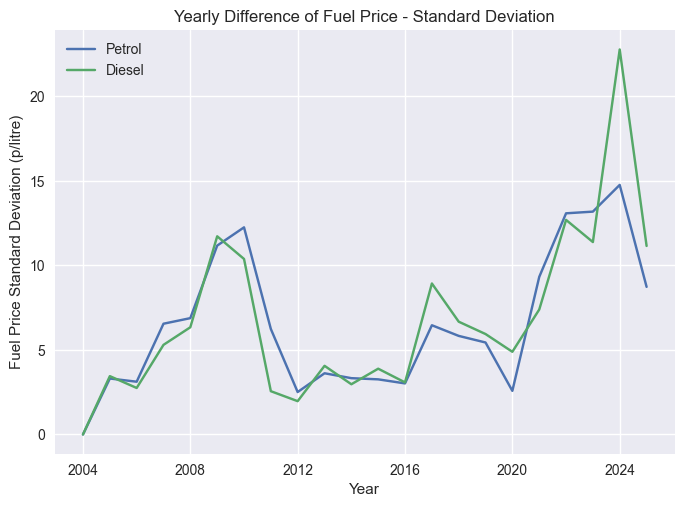

In [ ]:

#plot standard deviation of fuel price yearly difference 
plt.plot(data_no_sales["Petrol Price (p/litre)", "Yearly Difference"].groupby(pd.Grouper(freq='YE')).std().astype(float).round(precision),label="Petrol")
plt.plot(data_no_sales["Diesel Price (p/litre)", "Yearly Difference"].groupby(pd.Grouper(freq='YE')).std().astype(float).round(precision),label="Diesel")
plt.legend()

#set x and y label
plt.xlabel("Year")
plt.ylabel("Fuel Price Standard Deviation (p/litre)")

#set title
plt.title("Yearly Difference of Fuel Price - Standard Deviation")

Further analysis (that will not be investigated due to time constraints) may be derived from investigating these times and potential causes of such large price fluctuations. Perhaps leading to top contributors for fuel price changes to inform machine learning model or direct fuel buyer purchase timing and options. Same goes for greatest fuel price rise aswell (in the next cell)

In [160]:

#top 5 years with the greatest fuel price drop
display(data_no_sales[[
    ("Petrol Price (p/litre)", "Yearly Difference"),
    ("Diesel Price (p/litre)", "Yearly Difference")
]].groupby(pd.Grouper(freq='YE')).mean().astype(float).round(precision).sort_values([
    ("Petrol Price (p/litre)", "Yearly Difference")]).iloc[:5,:])




,Petrol Price (p/litre),Diesel Price (p/litre)
,Yearly Difference,Yearly Difference
Date,,
2023-12-31,-16.99,-19.65
2015-12-31,-16.38,-18.48
2020-12-31,-10.88,-12.25
2009-12-31,-7.41,-13.41
2014-12-31,-6.90,-7.11


In [161]:

#top 5 years with the greatest fuel price increase
display(data_no_sales[[
    ("Petrol Price (p/litre)", "Yearly Difference"),
    ("Diesel Price (p/litre)", "Yearly Difference")
]].groupby(pd.Grouper(freq='YE')).mean().astype(float).round(precision).sort_values([
    ("Petrol Price (p/litre)", "Yearly Difference")]).iloc[-5:,:])


,Petrol Price (p/litre),Diesel Price (p/litre)
,Yearly Difference,Yearly Difference
Date,,
2008-12-31,12.38,20.37
2011-12-31,16.51,19.57
2021-12-31,17.30,15.58
2010-12-31,17.31,15.09
2022-12-31,33.24,42.74


Although fue price seems relatively steady throughout, in recent years (2022-present) the difference in fuel prices is large. Positive values show diesel is much higher than petrol. Shows petrol is more of a more sensible fuel choice more now than before. 
There is also a spike in 2008. Potentially due to fuel type changes. All values are positive showing diesel is not only more expensive, but tends to fluctuate in how much more expensive it gets. Recent years it is much more expensive than petrol. Events seem to not effect both fuel types the same. Petrols price seems to be more resistive to price change than diesel

Bimodal distribution

,Fuel Price Difference (p/litre)
,
Date,
2003-12-31,1.70
2004-12-31,1.64
2005-12-31,4.02
2006-12-31,3.78
2007-12-31,2.62
2008-12-31,10.56
2009-12-31,4.55
2010-12-31,2.33


Text(0.5, 1.0, 'Average Yearly Fuel Type Price Difference')

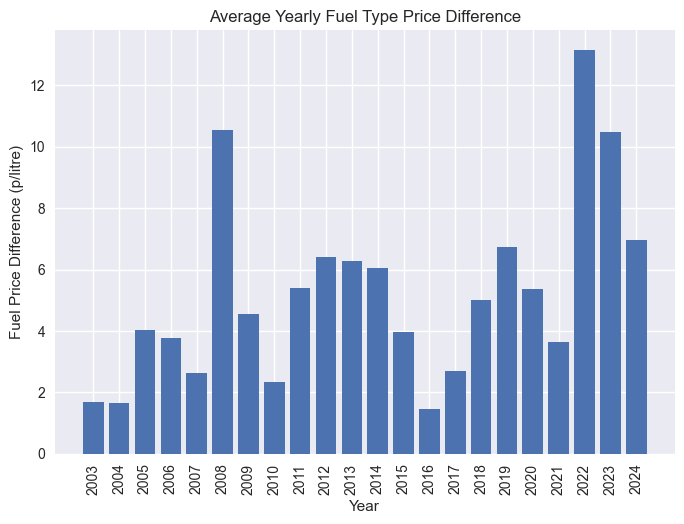

In [ ]:

#Average fuel price difference
avg_fuel_price_change = pd.DataFrame(data_no_sales.groupby(pd.Grouper(freq='YE')).mean())[[
    "Fuel Price Difference (p/litre)"
    ]].astype(float).round(precision)
display(avg_fuel_price_change)

#Plot average fuel price difference
plt.bar(avg_fuel_price_change.index.year,avg_fuel_price_change["Fuel Price Difference (p/litre)"])

#set x and y label
plt.ylabel("Fuel Price Difference (p/litre)")
plt.xlabel("Year")

#set x ticks to be year instead of the full date and put them vertical. Make sure each bar has its own x value visible in the graph
plt.xticks(avg_fuel_price_change.index.year,rotation="vertical")

#set title
plt.title("Average Yearly Fuel Type Price Difference")

Despite the large yearly differenecs, within the year, the fuel price within the year do not seem to fluctuate in previous years. The fuel price experienced is not likely to change throughout by much. 2022 however showed a large spread in fuel prices, leading to the large yearly difference seen above. 

,Petrol Price (p/litre),Diesel Price (p/litre)
,Weekly Difference,Weekly Difference
Date,,
2020-12-31,1.301864,1.045054
2021-12-31,0.618202,0.679908
2022-12-31,2.637885,2.822402
2023-12-31,1.004278,1.413035
2024-12-31,0.851545,0.985454


Text(0.5, 1.0, 'Fuel Price Weekly Difference Average by Year - Standard Deviation')

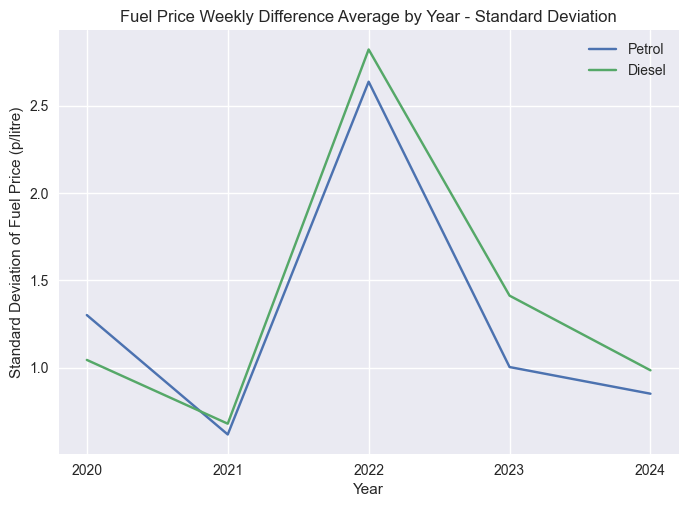

In [ ]:


#spread each year of fuel prices
display(data_with_sales[[
    ("Petrol Price (p/litre)","Weekly Difference"),
    ("Diesel Price (p/litre)","Weekly Difference")]].groupby(pd.Grouper(freq="Y")).std())

petrol_price_fluctuation = data_with_sales[
    ("Petrol Price (p/litre)","Weekly Difference")].groupby(pd.Grouper(freq="Y")).std()

diesel_price_fluctuation = data_with_sales[
    ("Diesel Price (p/litre)","Weekly Difference")].groupby(pd.Grouper(freq="Y")).std()

#plot spread of fuel type for each fuel type
plt.plot(petrol_price_fluctuation.index.year,petrol_price_fluctuation,label="Petrol")
plt.plot(diesel_price_fluctuation.index.year,diesel_price_fluctuation,label="Diesel")

#assign x ticks as the year instead of full date. Only data points should have an label
plt.xticks(diesel_price_fluctuation.index.year)

#set x and y label
plt.xlabel("Year")
plt.ylabel("Standard Deviation of Fuel Price (p/litre)")
plt.legend()

#set title
plt.title("Fuel Price Weekly Difference Average by Year - Standard Deviation")

Diesel has had a greater price change variation overall. Previously seen as a positive price increase. Prone to the most fluctautions.

Text(0.5, 1.0, 'Overal Fuel Standard Deviation')

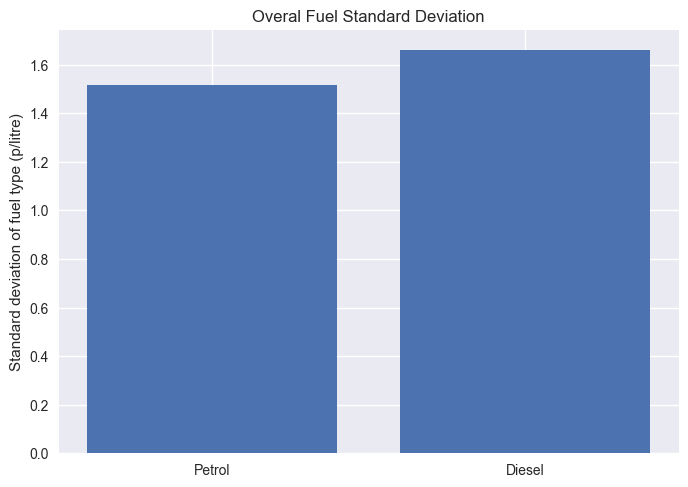

In [ ]:

#Overall spread of fuel prices
data_with_sales[[
    ("Petrol Price (p/litre)","Weekly Difference"),
    ("Diesel Price (p/litre)","Weekly Difference")]].std()

#plot spread of fuel prices overall
plt.bar(["Petrol","Diesel"],data_with_sales[[
    ("Petrol Price (p/litre)","Weekly Difference"),
    ("Diesel Price (p/litre)","Weekly Difference")]].std())

#set y label
plt.ylabel("Standard deviation of fuel type (p/litre)")

#set title
plt.title("Overal Fuel Standard Deviation")

There are a handful of instances where diesel was cheaper than fuel. 

In [186]:
#rows where diesel was a cheaper option
data_no_sales[data_no_sales["Diesel Price (p/litre)","Weekly Price"]<data_no_sales["Petrol Price (p/litre)","Weekly Price"]]


Petrol Price (p/litre)                                      \
                     Weekly Price Weekly Difference Yearly Difference   
Date                                                                    
2015-08-03                 116.12             -0.33            -13.51   
2015-08-10                 115.48             -0.63            -13.93   
2015-08-17                 114.58              -0.9            -14.71   
2015-08-24                 113.23             -1.35            -15.11   
2015-08-31                 111.21             -2.02             -16.8   
2015-09-07                  110.9             -0.31            -17.45   
2015-09-14                  110.6             -0.29            -17.83   
2015-09-21                 110.61               0.0            -18.01   
2016-02-01                 101.36             -0.06             -4.68   
2016-02-08                 101.51              0.15             -4.85   
2016-02-15                 101.45             -0.06             -5.81   
2016-02-22                 101.39             -0.06             -6.95   
2016-02-29                 101.42               0.0             -7.78   

                             Diesel Price (p/litre)                    \
           Duty Rate VAT (%)           Weekly Price Weekly Difference   
Date                                                                    
2015-08-03     57.95    20.0                 115.17             -1.78   
2015-08-10     57.95    20.0                  114.2             -0.97   
2015-08-17     57.95    20.0                 112.05             -2.15   
2015-08-24     57.95    20.0                 111.05              -1.0   
2015-08-31     57.95    20.0                 109.92             -1.13   
2015-09-07     57.95    20.0                 109.78             -0.14   
2015-09-14     57.95    20.0                 109.95              0.16   
2015-09-21     57.95    20.0                 110.52              0.58   
2016-02-01     57.95    20.0                 100.84              -0.7   
2016-02-08     57.95    20.0                 101.14               0.3   
2016-02-15     57.95    20.0                 101.21              0.08   
2016-02-22     57.95    20.0                 101.13             -0.09   
2016-02-29     57.95    20.0                 101.38              0.25   

                                               Fuel Price Difference (p/litre)  
           Yearly Difference Duty Rate VAT (%)                                  
Date                                                                            
2015-08-03            -19.13     57.95    20.0                           -0.95  
2015-08-10            -19.65     57.95    20.0                           -1.28  
2015-08-17            -21.69     57.95    20.0                           -2.53  
2015-08-24            -22.11     57.95    20.0                           -2.18  
2015-08-31            -22.85     57.95    20.0                           -1.29  
2015-09-07            -23.31     57.95    20.0                           -1.12  
2015-09-14            -23.19     57.95    20.0                           -0.65  
2015-09-21             -22.8     57.95    20.0                           -0.09  
2016-02-01            -12.78     57.95    20.0                           -0.52  
2016-02-08            -12.77     57.95    20.0                           -0.37  
2016-02-15            -13.51     57.95    20.0                           -0.24  
2016-02-22            -14.61     57.95    20.0                           -0.26  
2016-02-29            -15.26     57.95    20.0                           -0.04

Final table structure view

In [ ]:
#TABLE VIEW

from IPython.display import display

display(data_no_sales)
display(data_with_sales)

Petrol Price (p/litre)                                      \
                     Weekly Price Weekly Difference Yearly Difference   
Date                                                                    
2003-06-09                  74.59               0.0               0.0   
2003-06-16                  74.47             -0.12               0.0   
2003-06-23                  74.42               0.0               0.0   
2003-06-30                  74.35             -0.07               0.0   
2003-07-07                  74.28             -0.07               0.0   
...                           ...               ...               ...   
2024-10-28                 134.41              0.43            -19.56   
2024-11-04                 134.41               0.0            -18.79   
2024-11-11                 134.59              0.18             -17.8   
2024-11-18                 134.85              0.25            -15.65   
2024-11-25                 135.37              0.52            -12.63   

                             Diesel Price (p/litre)                    \
           Duty Rate VAT (%)           Weekly Price Weekly Difference   
Date                                                                    
2003-06-09     45.82    17.5                  76.77               0.0   
2003-06-16     45.82    17.5                  76.69             -0.08   
2003-06-23     45.82    17.5                  76.62             -0.07   
2003-06-30     45.82    17.5                  76.51             -0.12   
2003-07-07     45.82    17.5                  76.46               0.0   
...              ...     ...                    ...               ...   
2024-10-28     52.95    20.0                 139.71              0.45   
2024-11-04     52.95    20.0                 139.84              0.13   
2024-11-11     52.95    20.0                 140.13              0.29   
2024-11-18     52.95    20.0                 140.49              0.35   
2024-11-25     52.95    20.0                  141.4              0.92   

                                               Fuel Price Difference (p/litre)  
           Yearly Difference Duty Rate VAT (%)                                  
Date                                                                            
2003-06-09               0.0     45.82    17.5                            2.18  
2003-06-16               0.0     45.82    17.5                            2.22  
2003-06-23               0.0     45.82    17.5                             2.2  
2003-06-30               0.0     45.82    17.5                            2.16  
2003-07-07               0.0     45.82    17.5                            2.18  
...                      ...       ...     ...                             ...  
2024-10-28            -22.05     52.95    20.0                             5.3  
2024-11-04            -21.02     52.95    20.0                            5.43  
2024-11-11            -20.25     52.95    20.0                            5.54  
2024-11-18            -17.95     52.95    20.0                            5.64  
2024-11-25            -14.78     52.95    20.0                            6.03  

[1121 rows x 11 columns]

Petrol Price (p/litre)                                      \
                     Weekly Price Weekly Difference Yearly Difference   
Date                                                                    
2020-01-27                 127.33              0.16              8.05   
2020-02-03                 125.85             -1.49              6.72   
2020-02-10                 124.73             -1.12              5.76   
2020-02-17                  123.8             -0.93              4.75   
2020-02-24                 123.45             -0.35              4.22   
...                           ...               ...               ...   
2024-08-26                 141.01             -0.95             -9.72   
2024-09-02                 139.96             -1.05            -11.75   
2024-09-09                  138.1             -1.86            -14.99   
2024-09-16                 136.49             -1.61            -17.58   
2024-09-23                 135.26             -1.23            -20.15   

                             Diesel Price (p/litre)                    \
           Duty Free VAT (%)           Weekly Price Weekly Difference   
Date                                                                    
2020-01-27     57.95    20.0                 132.88              0.14   
2020-02-03     57.95    20.0                 131.48             -1.41   
2020-02-10     57.95    20.0                  129.7             -1.77   
2020-02-17     57.95    20.0                  128.2              -1.5   
2020-02-24     57.95    20.0                 127.67             -0.53   
...              ...     ...                    ...               ...   
2024-08-26     52.95    20.0                 146.15             -1.28   
2024-09-02     52.95    20.0                 145.19             -0.96   
2024-09-09     52.95    20.0                  143.4             -1.79   
2024-09-16     52.95    20.0                 141.61             -1.79   
2024-09-23     52.95    20.0                 140.02             -1.59   

                                               UK Sales (litres)          \
           Yearly Difference Duty Free VAT (%)            Petrol  Diesel   
Date                                                                       
2020-01-27              3.78     57.95    20.0              7089   11276   
2020-02-03              2.34     57.95    20.0              7119   11378   
2020-02-10              0.53     57.95    20.0            7086.3  9960.7   
2020-02-17             -1.03     57.95    20.0            6882.7  9896.6   
2020-02-24             -1.99     57.95    20.0            6892.1  9813.5   
...                      ...       ...     ...               ...     ...   
2024-08-26             -7.37     52.95    20.0            6897.6  7549.0   
2024-09-02             -9.46     52.95    20.0            7091.1  7683.7   
2024-09-09            -12.75     52.95    20.0            7012.5  8020.9   
2024-09-16            -16.55     52.95    20.0            7178.6  8170.3   
2024-09-23            -20.59     52.95    20.0            7178.8  8153.1   

                               UK Sales (£'000)                           
              Total Difference           Petrol Diesel  Total Difference  
Date                                                                      
2020-01-27    18366       4187             9.03  14.98  24.01       5.95  
2020-02-03    18497       4259             8.96  14.96  23.92       6.00  
2020-02-10  17047.3     2874.4             8.84  12.92  21.76       4.08  
2020-02-17  16779.4     3013.9             8.52  12.69  21.21       4.17  
2020-02-24  16705.7     2921.4             8.51  12.53  21.04       4.02  
...             ...        ...              ...    ...    ...        ...  
2024-08-26  14446.9      651.4             9.73  11.03  20.76       1.30  
2024-09-02  14774.8      592.6             9.92  11.16  21.08       1.24  
2024-09-09  15033.3     1008.4             9.68  11.50  21.18       1.82  


Plotting fuel prices alone with the difference between them shows overall change over the years. Combined with world events can provide some explanation to price changes, how they change, how the price gap between them change etc.

Key UK events are shown that may have been the cause of the price changes. The greatest impacts appear to be the 2008 Financial Chrisis and Covid-19+Russo-Ukrainian War. War, global pandemics and recessions effect price the most as seen from the visualization shown. Brexit and the US Oil Supply have an effect but not as strong of an effect. 

You can also see the difference in price alongside the actual price. 

Note the dates are roughly in place on the visualization using the reference material

Dates:
2008 Financial Chrisis (3), US Oil Oversupply (4), Brexit (5), COVID-19 (6), Russo-Ukrainian War (7)


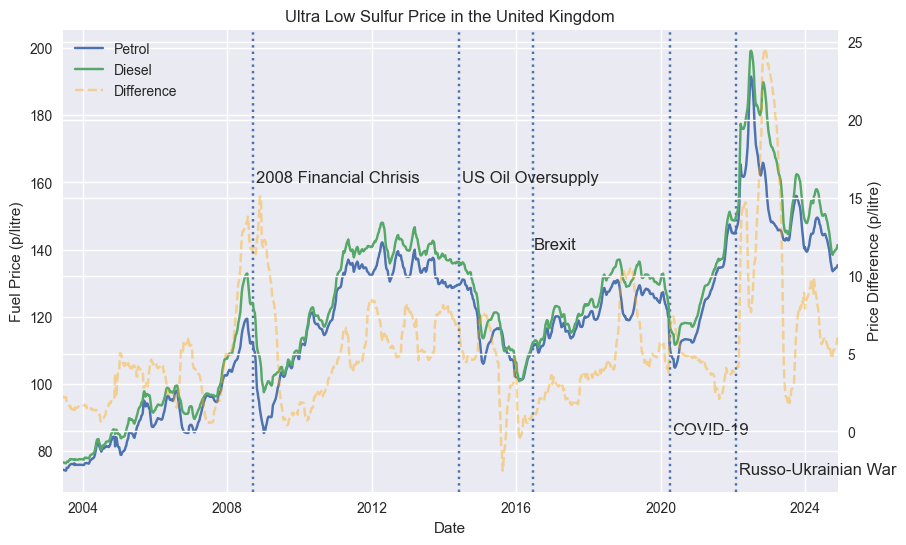

In [ ]:
#PLOTTING
import matplotlib.pyplot as plt
import datetime as dt

plt.style.use("seaborn")

fig = plt.figure(figsize=(10,6))
ax = plt.axes()


#set xlim
plt.xlim(data_no_sales.index[0],data_no_sales.index[-1])

#set x and y label
plt.xlabel("Date")
plt.ylabel("Fuel Price (p/litre)")

#set title
plt.title("Ultra Low Sulfur Price in the United Kingdom")


#2008 Financial Chrisis
plt.axvline(dt.datetime(2008,9,15),linestyle=":")
plt.text(dt.datetime(2008,10,15),160,'2008 Financial Chrisis',size=12)

#US Oil Oversupply
plt.axvline(dt.datetime(2014,6,1),linestyle=":")
plt.text(dt.datetime(2014,7,1),160,'US Oil Oversupply',size=12)

#Brexit
plt.axvline(dt.datetime(2016,6,23),linestyle=":")
plt.text(dt.datetime(2016,6,23),140,'Brexit',size=12)

#COVID-19
plt.axvline(dt.datetime(2020,4,1),linestyle=":")
plt.text(dt.datetime(2020,5,1),85,'COVID-19',size=12)


#Russo-Ukrainian War
plt.axvline(dt.datetime(2022,2,1),linestyle=":")
plt.text(dt.datetime(2022,3,1),73,'Russo-Ukrainian War',size=12)


#Plot fuel type prices
plt.plot(data_no_sales.index,data_no_sales["Petrol Price (p/litre)","Weekly Price"],label="Petrol")
plt.plot(data_no_sales.index,data_no_sales["Diesel Price (p/litre)","Weekly Price"],label="Diesel")

#define secondary axis
ax1 = ax.twinx()

#Plot fuel type difference on secondary axis
ax1.plot(data_no_sales.index,data_no_sales["Fuel Price Difference (p/litre)"],label="Difference",color="orange",alpha=0.4,linestyle="--")
ax1.set_ylabel("Price Difference (p/litre)")

ax.legend()
ax1.legend(loc=(0.009,0.84))


Looking at price difference alone along with events that may effect it to provide clearer views on it.

During the key events (similar to the previous visualization) the price difference also increases. Diesel increases more in price than petrol. There are regions were diesel becomes cheaper than petrol (see the section in which the graph goes negative) however this has only happened once over the 20 years (possibly due to US Oil Oversupply).

Covid and Brexit do not appear to have had a large difference in the price difference between the two fuel types. 

Russo-Ukraininan war and the 2008 Financial Chrisis appear to have the strongest effect on this price difference. War and Financial Chrisis' appearing to be the strongest factor leading to the difference in fuel type pricing.

Text(0.5, 1.0, 'Ultra Low Sulfur Price Difference by Fuel Type in the United Kingdom')

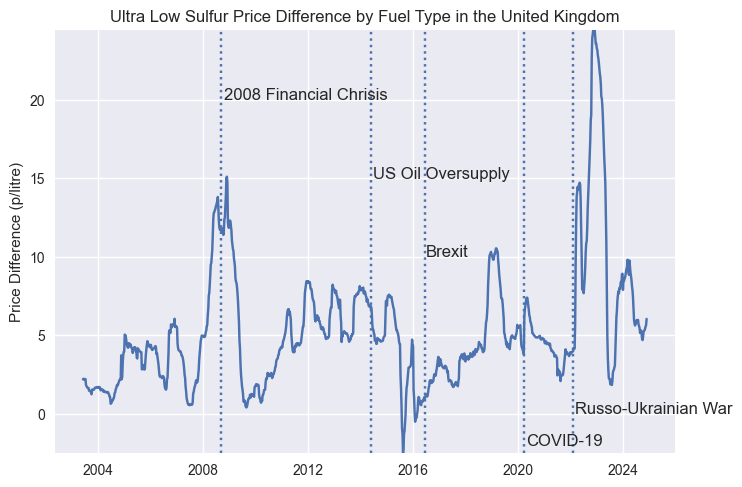

In [ ]:
plt.figure()

plt.ylim(data_no_sales["Fuel Price Difference (p/litre)"].min(),data_no_sales["Fuel Price Difference (p/litre)"].max())
#Plot fuel price difference
plt.plot(data_no_sales.index,data_no_sales["Fuel Price Difference (p/litre)"])
plt.ylabel("Price Difference (p/litre)")

#2008 Financial Chrisis
plt.axvline(dt.datetime(2008,9,15),linestyle=":")
plt.text(dt.datetime(2008,10,15),20,'2008 Financial Chrisis',size=12)

#US Oil Oversupply
plt.axvline(dt.datetime(2014,6,1),linestyle=":")
plt.text(dt.datetime(2014,7,1),15,'US Oil Oversupply',size=12)

#Brexit
plt.axvline(dt.datetime(2016,6,23),linestyle=":")
plt.text(dt.datetime(2016,6,23),10,'Brexit',size=12)

#COVID-19
plt.axvline(dt.datetime(2020,4,1),linestyle=":")
plt.text(dt.datetime(2020,5,1),-2,'COVID-19',size=12)

#Russo-Ukrainian War
plt.axvline(dt.datetime(2022,2,1),linestyle=":")
plt.text(dt.datetime(2022,3,1),0,'Russo-Ukrainian War',size=12)

#set title
plt.title("Ultra Low Sulfur Price Difference by Fuel Type in the United Kingdom")

VAT and DUTY FREE price can be plotted, however, the values are relatively static and do not vary much compared to the prices or sales etc and so may not be able to be used alone for much conclusion.

Can however see a large increase in tax from the financial chrisis yet a drop in duty free following the commencement of the Russo-Ukraininan war. 

Text(0.5, 1.0, 'Fuel Tax')

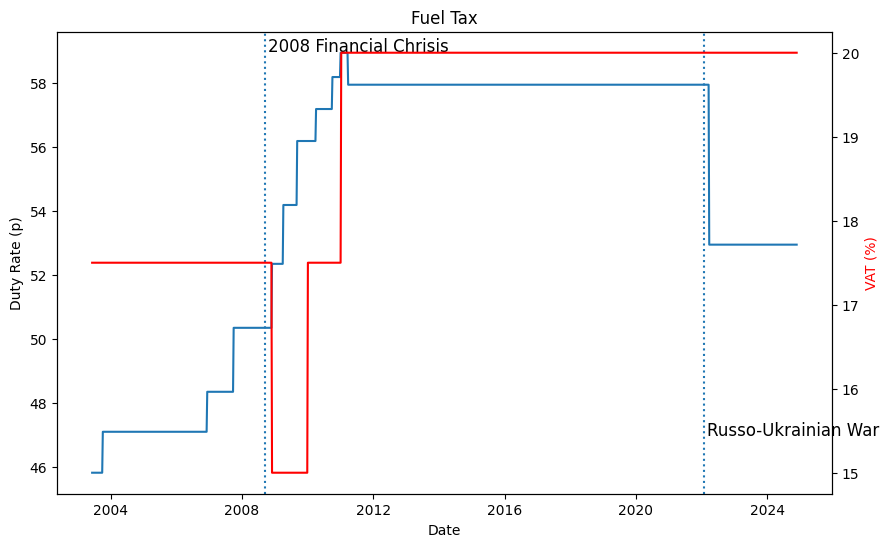

In [ ]:
plt.style.use("default")

fig = plt.figure(figsize=(10,6))
ax = plt.axes()

#define secondary axis
ax1 = ax.twinx()

#2008 Financial Chrisis
ax.axvline(dt.datetime(2008,9,15),linestyle=":")
ax.text(dt.datetime(2008,10,15),59,'2008 Financial Chrisis',size=12)

#Russo-Ukrainian War
ax.axvline(dt.datetime(2022,2,1),linestyle=":")
ax.text(dt.datetime(2022,3,1),47,'Russo-Ukrainian War',size=12)

#Plot duty rate
ax.set_xlabel("Date")
ax.set_ylabel("Duty Rate (p)")
ax.plot(data_no_sales.index,data_no_sales["Petrol Price (p/litre)","Duty Rate"])

#Plot duty rate on secondary axis
ax1.set_ylabel("VAT (%)",color="red")
ax1.plot(data_no_sales.index,data_no_sales["Petrol Price (p/litre)","VAT (%)"],color="red")
ax.set_title("Fuel Tax")

Investigating sales between petrol and diesel along with the effect of events. 

The overall sales amount made from fuel sales contionued rising till 2022 then eventually moved downwards.

The only world event that has clear effect on the sales is COVID-19 most likely due to travel restrictions. 

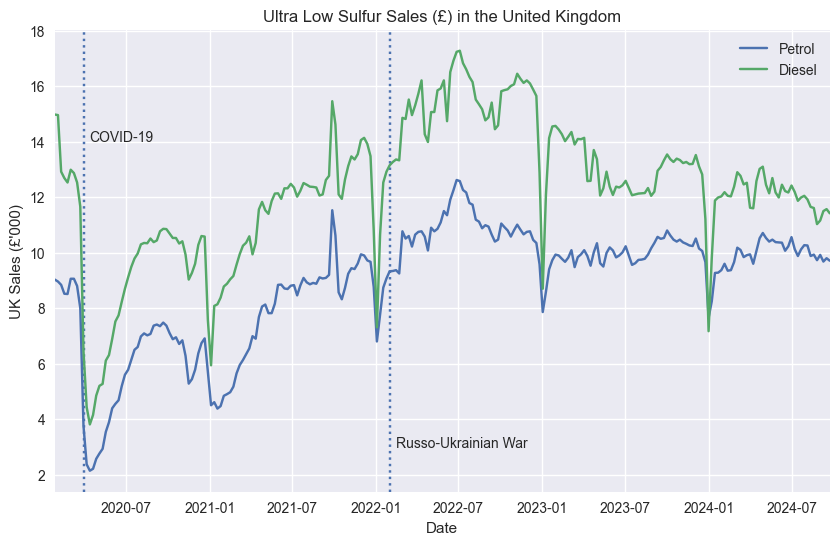

In [ ]:
plt.style.use("seaborn")
plt.figure(figsize=(10,6))

#set x lim 
plt.xlim(data_with_sales.index[0],data_with_sales.index[-1])

#set x and y label
plt.xlabel("Date")
plt.ylabel("UK Sales (£'000)")

#set title
plt.title("Ultra Low Sulfur Sales (£) in the United Kingdom")

#COVID-19
plt.axvline(dt.datetime(2020,4,1),linestyle=":")
plt.text(dt.datetime(2020,4,11),14,'COVID-19',size=10)

#Russo-Ukrainian War
plt.axvline(dt.datetime(2022,2,1),linestyle=":")
plt.text(dt.datetime(2022,2,15),3,'Russo-Ukrainian War',size=10)

#Plot fuel type sales in £
plt.plot(data_with_sales.index,data_with_sales["UK Sales (£'000)","Petrol"],label="Petrol")
plt.plot(data_with_sales.index,data_with_sales["UK Sales (£'000)","Diesel"],label="Diesel")

plt.legend()

The sales amount is relatively constant throughout. There are dips that appear like the above figure, most likely key holidays. Wont be investigated due to time constraints. Fuel sales figures may be a good metric to use to measure and predict the ammount of people that will be out of their houses. 

With the 3 peaks on the right of the figure, as seen above as well, the sales of petrol and price match. The same amount of fuel of petrol and diesel are sold on these days.

Overall, more diesel is sold than petrol despite its higher price. There is a clear demand and need for diesel vehicles on the road in the UK. Despite increase in price, sales stays the same.


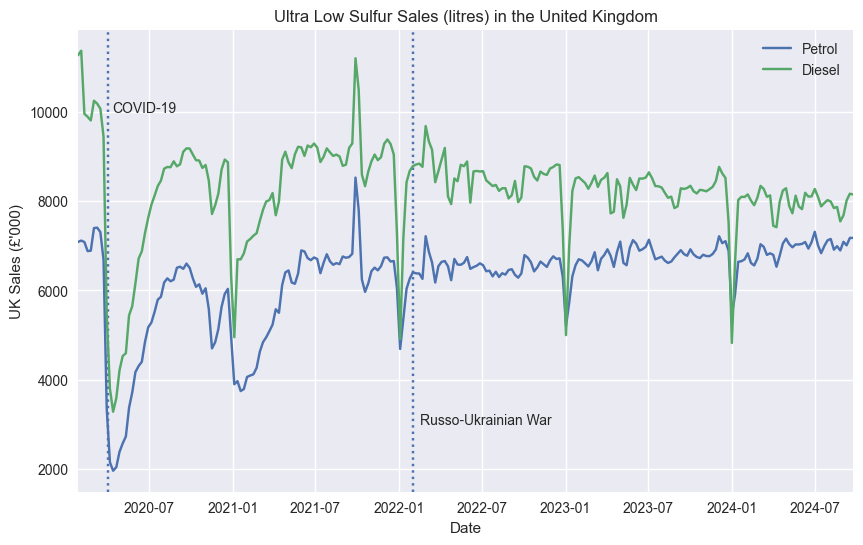

In [ ]:
plt.style.use("seaborn")
plt.figure(figsize=(10,6))

plt.xlim(data_with_sales.index[0],data_with_sales.index[-1])


plt.xlabel("Date")
plt.ylabel("UK Sales (£'000)")
plt.title("Ultra Low Sulfur Sales (litres) in the United Kingdom")

#COVID-19
plt.axvline(dt.datetime(2020,4,1),linestyle=":")
plt.text(dt.datetime(2020,4,11),10000,'COVID-19',size=10)

#Russo-Ukrainian War
plt.axvline(dt.datetime(2022,2,1),linestyle=":")
plt.text(dt.datetime(2022,2,15),3000,'Russo-Ukrainian War',size=10)


#Plot fuel type sales in litres
plt.plot(data_with_sales.index,data_with_sales["UK Sales (litres)","Petrol"],label="Petrol")
plt.plot(data_with_sales.index,data_with_sales["UK Sales (litres)","Diesel"],label="Diesel")

plt.legend()

Diesel sales are majority of the total fuel sales

Percentage of sales that are diesel:  57


Text(0.5, 1.0, 'Total Petrol and Diesel Sales')

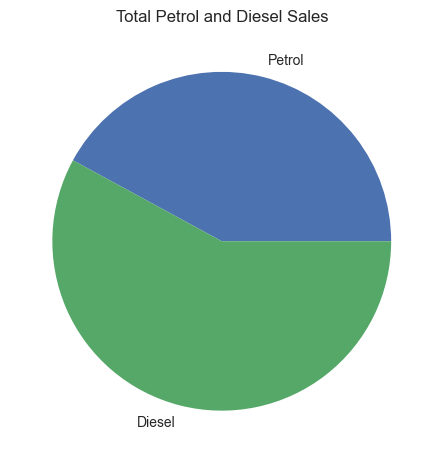

In [ ]:
petrolsum = data_with_sales["UK Sales (£'000)","Petrol"].sum()
dieselsum = data_with_sales["UK Sales (£'000)","Diesel"].sum()

#Plot pie of total sales of the different fuel types
plt.pie([petrolsum,dieselsum],labels=["Petrol","Diesel"])

#calculate and show percentage of sales that are diesel
print("Percentage of sales that are diesel: ",int(dieselsum/(petrolsum+dieselsum)*100))

#set title
plt.title("Total Petrol and Diesel Sales")

The difference in sales ammount between diesel and petrol is decreasing. Perhaps showing a decrease in demand for diesel vehicles or an increase in demand for petrol cars. Or due to diesel price increasing more than petrol prices. 

The difference in fuel type sales amount of money peaked during the war. Below will show the reason being that diesel increased in price much more.

Text(0.5, 1.0, 'UK Sales Difference by Fuel Type')

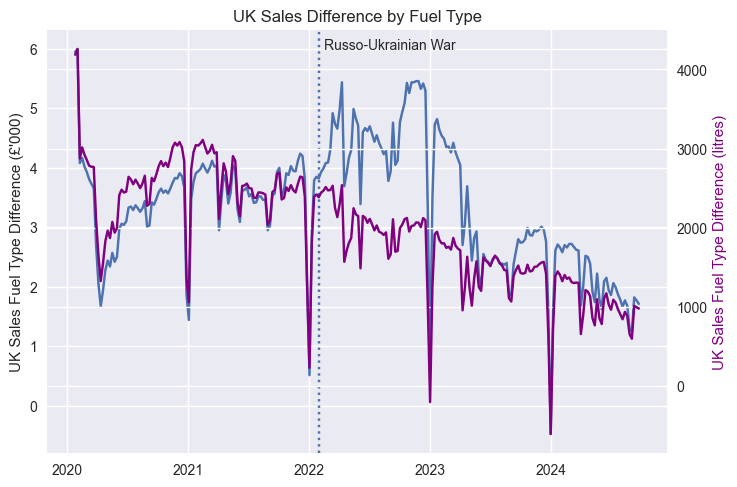

In [ ]:
fig = plt.figure()
ax = plt.axes()

#define secondary axis
ax1 = ax.twinx()

#set y label for primary and secondary axis
ax.set_ylabel("UK Sales Fuel Type Difference (£\'000)")
ax1.set_ylabel("UK Sales Fuel Type Difference (litres)",color="purple")

#Russo-Ukrainian War
ax.axvline(dt.datetime(2022,2,1),linestyle=":")
ax.text(dt.datetime(2022,2,15),6,'Russo-Ukrainian War',size=10)

#plot sales difference £ between fuel types on primary axis
ax.plot(data_with_sales["UK Sales (£\'000)","Difference"])

#plot sales difference litres between fuel types on secondary axis
ax1.plot(data_with_sales["UK Sales (litres)","Difference"],color="purple")

#set title
plt.title("UK Sales Difference by Fuel Type")

Looking at sales alone, not including the COVID-19 period, the demand seems to be relatively constant (not including the occasional dips). However in the above graph, the sales would increase despite no change in sales showing this is caused by greater fuel price alone. Demand seems not to change regardless of fuel price, showing the need for it.

Tax is also relatively constant within this period too. 

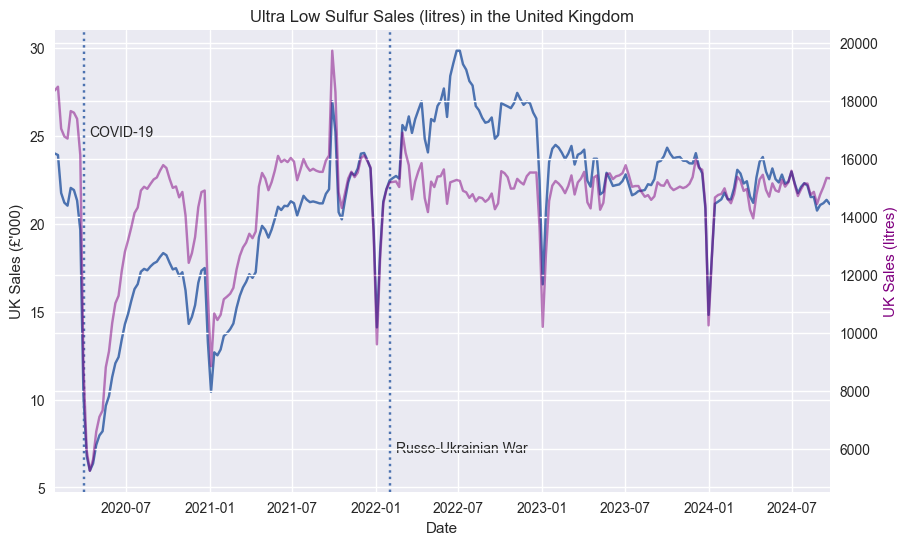

In [ ]:
plt.style.use("seaborn")
fig = plt.figure(figsize=(10,6))
ax = plt.axes()

#set x lim
plt.xlim(data_with_sales.index[0],data_with_sales.index[-1])

#set x and y label
plt.xlabel("Date")
plt.ylabel("UK Sales (£'000)")

#set title
plt.title("Ultra Low Sulfur Sales (litres) in the United Kingdom")

#Plot total fuel sales in £ on primary axis
ax.plot(data_with_sales.index,data_with_sales["UK Sales (£'000)","Total"],label="Total")

#COVID-19
plt.axvline(dt.datetime(2020,4,1),linestyle=":")
plt.text(dt.datetime(2020,4,11),25,'COVID-19',size=10)

#Russo-Ukrainian War
plt.axvline(dt.datetime(2022,2,1),linestyle=":")
plt.text(dt.datetime(2022,2,15),7,'Russo-Ukrainian War',size=10)

#define secondary axis
ax1 = ax.twinx()

#Plot total fuel sales in litres on the second axis
ax1.set_ylabel("UK Sales (litres)",color="purple")
ax1.plot(data_with_sales.index,data_with_sales["UK Sales (litres)","Total"],label="Total",color="purple",alpha=0.5)

#You can clearly see where the sales are effected by price alone and demand alone. Sales and demand were the same till 2022 (post war)

Despite higher prices, for both fuel types, the fuel sold and therefore demand are relatively constant. However, for middle fuel prices, the peak uk sales are reported. For low prices, the lowest sales are shown. 

As fuel prices dip, sales decreases as low fuel prices usually indicate recessions etc


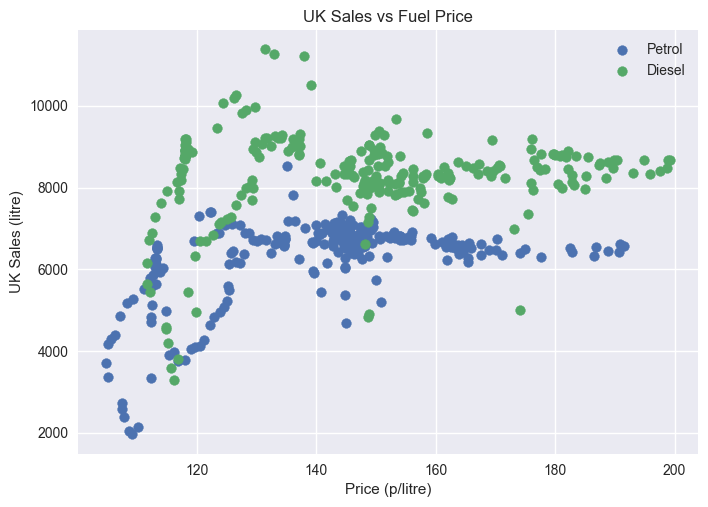

In [ ]:
#DO TOTAL SALES VS FUEL PRICE

plt.figure()

#set title
plt.title("UK Sales vs Fuel Price")

#set x and y label
plt.ylabel("UK Sales (litre)")
plt.xlabel("Price (p/litre)")

#plot price of petrol and diesel on scatter plot in litres vs fuel price
plt.scatter(data_with_sales["Petrol Price (p/litre)","Weekly Price"],data_with_sales["UK Sales (litres)","Petrol"],label = "Petrol")
plt.scatter(data_with_sales["Diesel Price (p/litre)","Weekly Price"],data_with_sales["UK Sales (litres)","Diesel"],label = "Diesel")

plt.legend()

As fuel price increase, the sales amount increases. Strong correlation shown

Correlation between Petrol price and sales:  0.87
Correlation between Diesel price and sales:  0.824


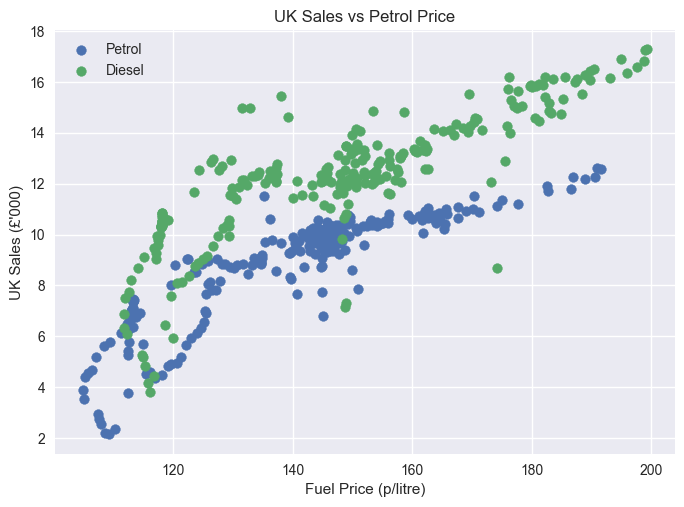

In [ ]:
#DO TOTAL SALES VS FUEL PRICE

plt.figure()

#set title
plt.title("UK Sales vs Petrol Price")

#set x and y label
plt.ylabel("UK Sales (£\'000)")
plt.xlabel("Fuel Price (p/litre)")

#plot price of petrol and diesel on scatter plot in £ vs fuel price 
plt.scatter(data_with_sales["Petrol Price (p/litre)","Weekly Price"],data_with_sales["UK Sales (£'000)","Petrol"],label = "Petrol")
plt.scatter(data_with_sales["Diesel Price (p/litre)","Weekly Price"],data_with_sales["UK Sales (£'000)","Diesel"],label = "Diesel")

plt.legend()

#Determine and display correlation between fuel price and uk sales
print("Correlation between Petrol price and sales: ",round(np.corrcoef(data_with_sales["Petrol Price (p/litre)","Weekly Price"].astype(float),data_with_sales["UK Sales (£'000)","Petrol"].astype(float))[0,1],3))
print("Correlation between Diesel price and sales: ",round(np.corrcoef(data_with_sales["Diesel Price (p/litre)","Weekly Price"].astype(float),data_with_sales["UK Sales (£'000)","Diesel"].astype(float))[0,1],3))

Petrol and Diesel price have overall a strong linear relationship between eachother, however have obvious large regions of deviation from this overall linear relationship which can be seen within the large chunks. This mainly appears for higher price ranges ~140 to 160 p/litre.

Correlation Coefficient:  0.9891921236752427


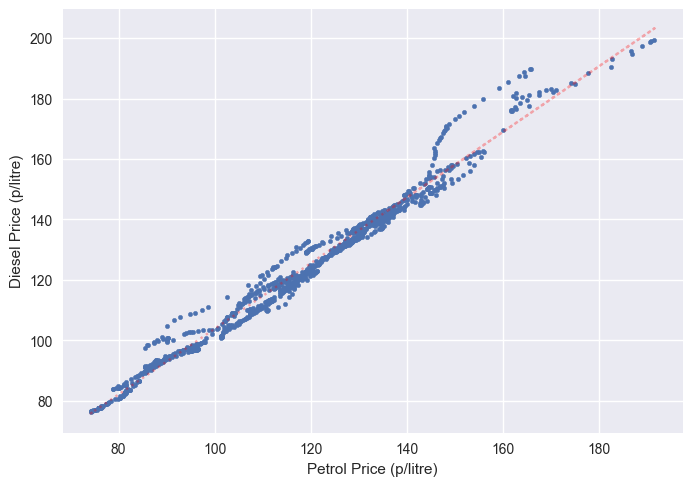

In [ ]:
x = data_no_sales["Petrol Price (p/litre)","Weekly Price"].to_numpy().astype(float)
y = data_no_sales["Diesel Price (p/litre)","Weekly Price"].to_numpy().astype(float)

#plot petrol vs diesel price on scatter
plt.scatter(x,y,s=10)

#set x and y label
plt.xlabel("Petrol Price (p/litre)")
plt.ylabel("Diesel Price (p/litre)")

#calculate and display correlation between petrol and diesel price
print("Correlation Coefficient: ", np.corrcoef(x,y)[1,0])

#calculate and plot line of best fit between the two
a, b = np.polyfit(x, y, 1)
plt.plot(x,a*x+b,color="red",alpha=0.3,linestyle=":")

At lower sales the revenue and price were more linear however at higher sales they deviate much more from linearity. However, there are more data points at the right extreme and so may not be an accurate conclusion. Not many data points on the left. Is not a clean straight line due to price fluctuations. 

Text(0.5, 1.0, 'UK Sales £ vs Litre')

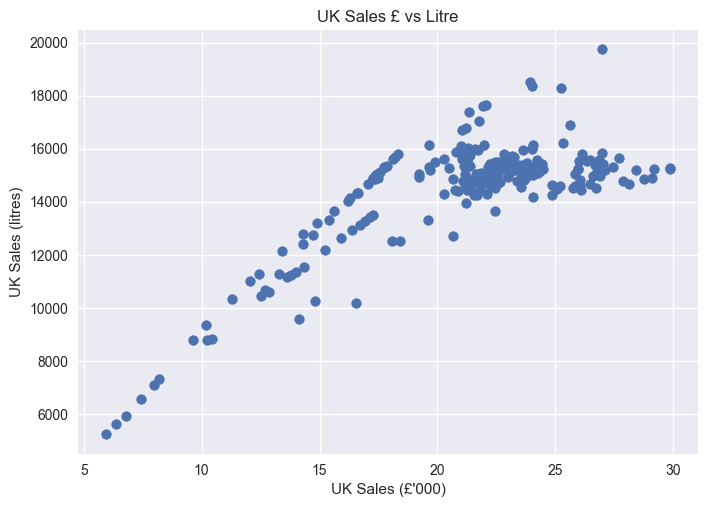

In [ ]:

x = data_with_sales["UK Sales (£'000)","Total"].to_numpy().astype(float)
y = data_with_sales["UK Sales (litres)","Total"].to_numpy().astype(float)

fig = plt.figure()
ax = plt.axes()

#plot uk sales £ vs litre
plt.scatter(x,y,s=50)

#set x and y label
plt.xlabel("UK Sales (£'000)")
plt.ylabel("UK Sales (litres)")

#set title
plt.title("UK Sales £ vs Litre")


From the graphs, different conclusions can be made. Although in the markdowns these points have already been made, they can be concluded below.

Disclaimer - the conclusions and reccomendations made are based on the findings from this dataset alone. Some of these conclusions will require more data to make solid reccomendations and conclusions, however within the time scope this is not possible. The conclusions and reccomendations are made 
solely on the limited data alone. There are other factors effecting these conclusions and reccomendations not considered including and not limited to : car prices, car economy and public transport availability. These conclusions are subject to change with additional presented data and finding.

Conclusions:

-Petrol is a much safer fuel when dealing with cost of living, recessions and global events. Diesel price fluctuates much more, with an increasing difference between the twos price. 

-World effects seem to effect fuel prices much more than direct tax changes (duty free and vat) of fuel prices. THe tax changes are a response of world events such as the world recession. The VAT and duty free changes are fairly constant throughout the data and do not change much. Could be investigated more but due to time constraints it was not. Can say that duty free prices are now more cheaper than a couple years ago.

-Trends of fuel price of petrol and diesel are pretty much the same. However, overall, diesel fluctuates more in price than petrol. If diesel is expected to go up, expect petrol prices to do the same. The amount at which they both increase and decrease are very similar.  The price changes effect diesel much more making it a less reliable option. 

-Petrol will most likely always be cheaper. Petrol has only a handful of recorded instances of being the more expensive alternative, most likely due to an oversupply of US Oil. Throughout the rest of the data, diesel is more expensive and so can be safe to say it will most likely be like this going forward with a handful of instances showing otherwise.

-Diesel prices variate much more. Subject to higher highs. Expect diesel vehicles to incure the majority of costs affiliated with world event chrisis'.

-There is however, a clear demand for diesel vehicles on the road. Most of the sales come from diesel vehicles. However, this diference is diminishing. The demand for petrol vehicles are increasing, perhaps due to an increased supply as they do represent newer vehicles. 

-The majority of fuel sales being diesel may imply that there are more diesel cars, or that they are less economic than petrol cars (neither can be said based on this data alone). Either way, with their more harmful characterisics towards the enviroment as more litres of diesel fuel are burnt, this is still an issue. This gap between sales is however diminishing, which is a good sign. 

-Fuel sales are constant despite increase in fuel prices. Shows a clear demand in them. May be an indiciator of poor public transport or lack of suitable alternative options. 


Reccomendations:

-Get a petrol car. Use petrol fuel. Although car fuel economy is not taken into account, this conclusion is only made based of the data present. Including vehicle fuel economy may very well change this reccomendation.

-Although car fuel economy may differ, in some instances where diesel price increases much more than petrol (world chrisis'), petrol may very well be the better choice in these cases as this price difference overshadows fuel economy. 

-In a world where global events are inevitable, and where countries are all interlocked in economy due to globalisation, these events are most likely to continue occuring based off of the history of events we have seen. From this, petrol seems to be more resistant to changes caused by these, resulting in better financial stability through these times. 

-Buying petrol fuel is much more reliable through economic chrisis' as the price tends to fluctuate less and consistently stays lower vs diesel which increases in price much more. 

-Diesel cars are much more present in sales. There is still a lot more of a market for diesel vehicles than petrol vehicles, which may be an important point to consider when making automotive and policy decisions.

-Despite price increasing, fuel purchasing stays the same. People need fuel, regardless of price. May be worth holding fuel when the price is lower or when the news present stories that may very well effect the world economy. Using cars less is an unreasonable request, as the data shows people need fuel.
People should definetly invest in more economic vehicles due to this demand for fuel, as it will help with the fuel price fluctuations.

-Sales difference between the two fuel types shows the decreasing demand in diesel fuel is decreasing or petrol demand is increasing. Meaning the demand for diesel vehicles are decreasing and petrol vehicles increasing. Diesel cars may lose value due to this so may make sense to sell them and invest in a 
petrol car.

References:

1. Zero, D. for E.S. and N. (2023). Petrol and diesel prices. [online] www.data.gov.uk. Available at: https://www.data.gov.uk/dataset/21db6396-3daf-4d90-8b3f-054995256018/petrol-and-diesel-prices.

2. D. (2020). Average road fuel sales, deliveries and stock levels. [online] Data.gov.uk. Available at: https://www.data.gov.uk/dataset/9003012e-4564-4a6b-b5f0-8765ccb23a03/average-road-fuel-sales-deliveries-and-stock-levels [Accessed 3 Dec. 2024].

3. Guillén, M.F. and Suárez, S.L. (n.d.). 4 The Global Financial and Economic Crisis: A Drama in Three Acts. In: Globalization. [online] doi:https://doi.org/10.9783/9781934536797.115.

4. OPEC Monthly Oil Market Report. (2015). [online] opec.org, Helferstorferstrasse 17, A-1010 Vienna, Austria: Organization of the Petroleum Exporting Countries, p.107. Available at: https://www.opec.org/opec_web/static_files_project/media/downloads/publications/MOMR_December_2015.pdf [Accessed 3 Dec. 2024].

5. Walker, N. (2021). Brexit timeline: events leading to the UK’s exit from the European Union. UK Parliament, [online] 7960. Available at: https://commonslibrary.parliament.uk/research-briefings/cbp-7960/.

6. CDC (2023). COVID-19 Timeline. [online] Centers for Disease Control and Prevention. Available at: https://www.cdc.gov/museum/timeline/covid19.html.

7. ‌Bolton, P. (2022). Oil prices. [online] researchbriefings, London: House of Commons Library, p.24. Available at: https://researchbriefings.files.parliament.uk/documents/SN02106 [Accessed 3 Dec. 2024].
